# nk

In [1]:
library(Seurat)
library(pheatmap)
library(purrr)
library(dplyr)
library(stringr)
library(harmony)

Attaching SeuratObject


载入程辑包：‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


载入需要的程辑包：Rcpp



In [2]:
top_genes = function(degs){
    rownames(degs) = NULL
    degs = degs[!str_detect(degs$gene,'^RPL'),]
    degs = degs[!str_detect(degs$gene,'^RPS'),]
    for (cluster in unique(degs$cluster)){
        message(cluster)
        print(degs[degs$cluster == cluster,] %>% arrange(desc(avg_log2FC)) %>% head(n=50))
    } 
}

In [3]:
nk = readRDS('~/HPV/res/public_rna/seurat_rds/annotated/nk.rds')

In [4]:
Idents(nk) = nk$minor
degs = FindAllMarkers(nk,logfc.threshold = 0.25,return.thresh = 0.05)

Calculating cluster NKCD56_2

Calculating cluster NKCD56_3

Calculating cluster NKcc

Calculating cluster NKCD56_4

Calculating cluster NKCD16

Calculating cluster NKCD56_1

Calculating cluster ILC3



In [5]:
top_genes(degs)

NKCD56_2



          p_val avg_log2FC pct.1 pct.2    p_val_adj  cluster     gene
1  1.368034e-56  2.2455225 0.490 0.147 2.604601e-52 NKCD56_2    HSPA6
2  3.061918e-72  2.0290218 0.892 0.548 5.829585e-68 NKCD56_2   DNAJB1
3  6.524084e-80  1.9045962 0.903 0.526 1.242120e-75 NKCD56_2    HSPD1
4  2.062250e-90  1.8634274 0.901 0.469 3.926318e-86 NKCD56_2    HSPH1
5  1.949763e-73  1.8103285 0.476 0.109 3.712153e-69 NKCD56_2     BAG3
6  1.773243e-72  1.7980467 0.926 0.615 3.376077e-68 NKCD56_2   HSPA1A
7  1.601322e-63  1.6183644 0.903 0.607 3.048757e-59 NKCD56_2    HSPE1
8  5.236602e-67  1.6134865 0.989 0.901 9.969967e-63 NKCD56_2 HSP90AA1
9  1.593187e-74  1.6036974 0.897 0.498 3.033268e-70 NKCD56_2   HSPA1B
10 5.719318e-60  1.5054589 0.411 0.094 1.088901e-55 NKCD56_2   DNAJA4
11 2.983240e-27  1.4900958 0.437 0.195 5.679791e-23 NKCD56_2    PLPP1
12 3.460452e-55  1.4061800 0.538 0.181 6.588355e-51 NKCD56_2  ZFAND2A
13 3.965988e-48  1.4027297 0.729 0.392 7.550845e-44 NKCD56_2   CACYBP
14 1.391921e-43  1.3

NKCD56_3



          p_val avg_log2FC pct.1 pct.2    p_val_adj  cluster       gene
1  8.766123e-28  1.2113291 0.447 0.247 1.668982e-23 NKCD56_3      KRT81
2  4.360664e-23  1.1468813 0.616 0.480 8.302269e-19 NKCD56_3       IL32
3  9.879872e-20  0.9945983 0.415 0.249 1.881029e-15 NKCD56_3      KRT86
4  1.850359e-13  0.9892273 0.371 0.237 3.522898e-09 NKCD56_3 AC007952.4
5  9.080711e-09  0.9812032 0.373 0.277 1.728877e-04 NKCD56_3       GZMK
6  4.342207e-23  0.9559362 0.451 0.257 8.267129e-19 NKCD56_3     ZNF683
7  3.927261e-24  0.9552300 0.783 0.648 7.477112e-20 NKCD56_3       GZMA
8  2.895265e-41  0.9483298 0.895 0.764 5.512294e-37 NKCD56_3       CCL5
9  2.560018e-31  0.9430223 0.438 0.206 4.874019e-27 NKCD56_3      IGHA1
10 9.242174e-35  0.9094148 0.812 0.760 1.759618e-30 NKCD56_3        CD7
11 7.642790e-39  0.9061306 0.922 0.924 1.455111e-34 NKCD56_3       ACTB
12 7.984505e-29  0.8889193 0.575 0.358 1.520170e-24 NKCD56_3     S100A9
13 3.945251e-19  0.8866424 0.806 0.796 7.511364e-15 NKCD56_3    

NKcc



           p_val avg_log2FC pct.1 pct.2     p_val_adj cluster      gene
1   7.410472e-92   3.126689 0.869 0.161  1.410880e-87    NKcc     STMN1
2  1.439357e-160   2.862987 0.720 0.036 2.740391e-156    NKcc     MKI67
3  2.234788e-206   2.790382 0.692 0.017 4.254812e-202    NKcc      RRM2
4   7.162641e-98   2.551847 0.654 0.061  1.363695e-93    NKcc     CENPF
5  8.140041e-158   2.504492 0.533 0.013 1.549782e-153    NKcc      ASPM
6   5.924585e-36   2.423548 0.869 0.462  1.127982e-31    NKcc    TUBA1B
7   1.118919e-48   2.387606 0.897 0.380  2.130310e-44    NKcc     HMGB2
8   9.676778e-49   2.280240 0.822 0.291  1.842362e-44    NKcc      TUBB
9  3.165950e-149   2.270245 0.710 0.040 6.027652e-145    NKcc      TYMS
10 3.066660e-168   2.210804 0.729 0.034 5.838614e-164    NKcc     PCLAF
11 2.820452e-143   2.071863 0.533 0.017 5.369858e-139    NKcc     TOP2A
12 3.695314e-113   1.964820 0.598 0.038 7.035508e-109    NKcc    NUSAP1
13 3.425999e-142   1.957164 0.626 0.029 6.522760e-138    NKcc   

NKCD56_4



          p_val avg_log2FC pct.1 pct.2    p_val_adj  cluster      gene
1  1.089898e-20  1.2133326 0.454 0.225 2.075057e-16 NKCD56_4      LDB2
2  7.268447e-19  1.2090254 0.504 0.284 1.383840e-14 NKCD56_4     KCNQ5
3  9.797109e-03  1.1779209 0.285 0.241 1.000000e+00 NKCD56_4     PLPP1
4  2.290016e-20  1.1119086 0.211 0.057 4.359962e-16 NKCD56_4    KIF26B
5  1.645232e-16  1.0693243 0.440 0.240 3.132356e-12 NKCD56_4      PVT1
6  1.117819e-26  1.0371284 0.708 0.449 2.128216e-22 NKCD56_4      CASK
7  5.858332e-08  1.0354277 0.190 0.091 1.115368e-03 NKCD56_4    SAMD12
8  1.811733e-20  1.0205296 0.669 0.454 3.449358e-16 NKCD56_4    SRGAP3
9  4.032384e-17  1.0163903 0.651 0.451 7.677256e-13 NKCD56_4     ITGA1
10 8.689949e-19  1.0109934 0.588 0.368 1.654479e-14 NKCD56_4     MLLT3
11 1.093961e-18  0.9800205 0.528 0.307 2.082792e-14 NKCD56_4      CLNK
12 4.137268e-19  0.9673114 0.771 0.627 7.876944e-15 NKCD56_4    ZBTB20
13 1.810043e-13  0.9657875 0.648 0.501 3.446142e-09 NKCD56_4       TOX
14 5.4

NKCD16



           p_val avg_log2FC pct.1 pct.2     p_val_adj cluster      gene
1  5.135970e-234  2.9265887 0.786 0.050 9.778373e-230  NKCD16    FGFBP2
2  9.595266e-143  2.2202098 0.871 0.201 1.826843e-138  NKCD16    FCGR3A
3   3.866581e-39  2.1540654 0.570 0.245  7.361584e-35  NKCD16    CCL4L2
4   6.499404e-66  2.0947822 0.909 0.563  1.237421e-61  NKCD16      CCL4
5  1.589032e-115  2.0262259 0.660 0.119 3.025359e-111  NKCD16     SPON2
6   4.965655e-82  1.8576558 0.748 0.254  9.454110e-78  NKCD16      GZMH
7   2.556068e-75  1.7275772 0.346 0.036  4.866498e-71  NKCD16     MYOM2
8   5.350994e-81  1.6672438 0.919 0.563  1.018776e-76  NKCD16      CST7
9   4.995239e-28  1.6344374 0.566 0.292  9.510436e-24  NKCD16      CCL3
10  2.212461e-49  1.6246837 0.184 0.011  4.212304e-45  NKCD16      SGCD
11  1.027988e-73  1.5634395 0.822 0.389  1.957187e-69  NKCD16     ARL4C
12  3.631188e-70  1.5390073 0.379 0.053  6.913420e-66  NKCD16     LAIR2
13  9.132243e-23  1.4692417 0.142 0.023  1.738688e-18  NKCD16   

NKCD56_1



           p_val avg_log2FC pct.1 pct.2     p_val_adj  cluster     gene
1  9.585909e-155   2.962169 0.843 0.113 1.825061e-150 NKCD56_1     IL7R
2   8.028475e-49   2.076238 0.600 0.187  1.528541e-44 NKCD56_1     LMNA
3   6.940190e-93   2.013415 0.790 0.186  1.321343e-88 NKCD56_1    SSBP2
4  3.055861e-127   1.803576 0.571 0.047 5.818054e-123 NKCD56_1    IRAK3
5   1.848633e-94   1.662361 0.505 0.051  3.519612e-90 NKCD56_1     AFF3
6  1.409860e-100   1.599490 0.667 0.103  2.684232e-96 NKCD56_1     SELL
7   7.926989e-74   1.563308 0.424 0.050  1.509219e-69 NKCD56_1   RASSF8
8   7.822604e-47   1.548231 0.748 0.318  1.489346e-42 NKCD56_1     CD55
9   7.794416e-64   1.520588 0.614 0.142  1.483979e-59 NKCD56_1      UST
10  1.423743e-72   1.481289 0.871 0.272  2.710665e-68 NKCD56_1    BACH2
11  4.451809e-41   1.435832 0.786 0.413  8.475799e-37 NKCD56_1    SMAP2
12  8.412130e-31   1.416618 0.590 0.254  1.601585e-26 NKCD56_1  IL12RB2
13  7.838224e-55   1.413449 0.390 0.062  1.492319e-50 NKCD56_1  

ILC3



           p_val avg_log2FC pct.1 pct.2     p_val_adj cluster       gene
1  1.345251e-154   3.102971  0.78 0.024 2.561223e-150    ILC3      PCDH9
2   2.843499e-87   3.097689  0.88 0.078  5.413737e-83    ILC3       AFF3
3   4.470623e-40   2.729589  0.86 0.172  8.511620e-36    ILC3       IL7R
4  7.546442e-118   2.412234  0.66 0.023 1.436767e-113    ILC3      IL4I1
5   7.995633e-34   2.389754  0.88 0.233  1.522288e-29    ILC3      SSBP2
6   6.687814e-50   2.380268  0.76 0.098  1.273293e-45    ILC3      HDAC9
7  1.162014e-136   2.377987  0.74 0.025 2.212358e-132    ILC3        KIT
8   8.879731e-40   2.280896  0.34 0.022  1.690612e-35    ILC3      PRKG1
9   1.885729e-37   2.117767  0.72 0.120  3.590239e-33    ILC3       SVIL
10  4.190971e-30   2.094201  0.78 0.178  7.979190e-26    ILC3   ARHGAP10
11  3.651019e-42   1.969960  0.68 0.092  6.951176e-38    ILC3       TOX2
12  1.261348e-40   1.891934  0.48 0.045  2.401481e-36    ILC3     PLXDC2
13  3.840320e-22   1.825502  0.90 0.363  7.311585e-

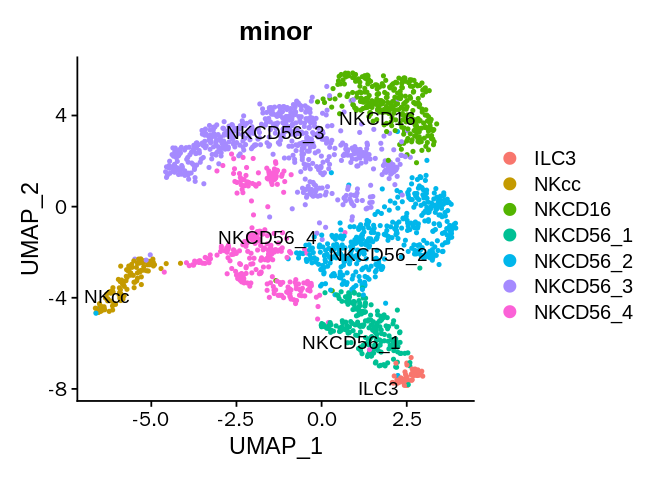

In [6]:
options(repr.plot.width = 5.5, repr.plot.height = 4)
DimPlot(nk, group.by = 'minor', label = TRUE,repel = TRUE)

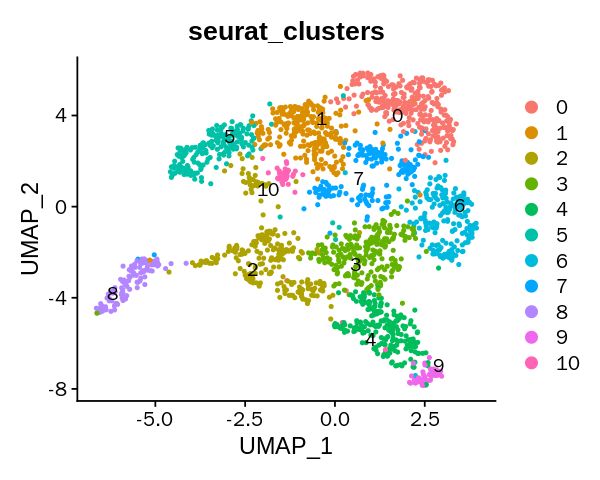

In [7]:
options(repr.plot.width = 5, repr.plot.height = 4)
DimPlot(nk, group.by = 'seurat_clusters', label = TRUE,repel = TRUE)

In [8]:
unique(nk$minor)

[1] "NKCD56_2" "NKCD56_3" "NKcc"     "NKCD56_4" "NKCD16"   "NKCD56_1" "ILC3"

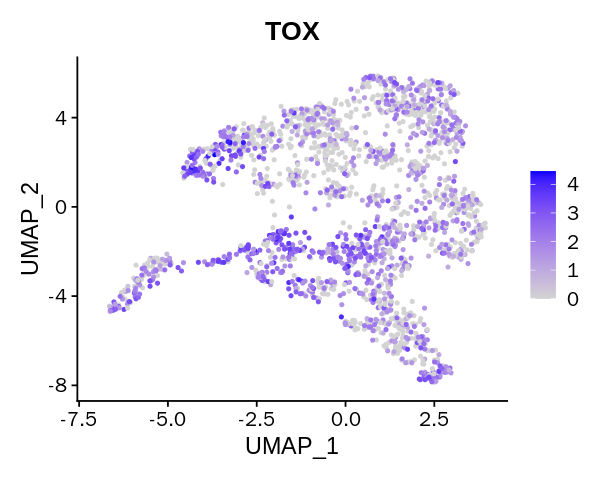

In [9]:
FeaturePlot(nk,features = c('TOX'))

In [10]:
nk$curated = nk$minor
nk$curated[nk$curated == 'NKcc'] = 'NK_MKI67'
nk$curated[nk$curated %in% c('NKCD16')] = 'NK_FCGR3A'
nk$curated[nk$curated == 'NKCD56_3'] = 'NK_ZNF683'
nk$curated[nk$curated == 'NKCD56_2'] = 'NK_RGS1'
nk$curated[nk$curated == 'NKCD56_1'] = 'NK_IL7R'
nk$curated[nk$curated == 'NKCD56_4'] = 'NK_TOX'

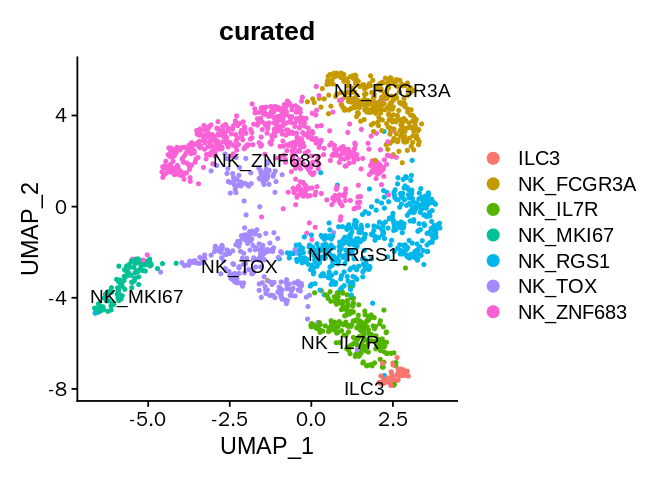

In [11]:
options(repr.plot.width = 5.5, repr.plot.height = 4)
DimPlot(nk, group.by = 'curated', label = TRUE,repel = TRUE)

In [12]:
saveRDS(nk,file = '~/HPV/res/public_rna/seurat_rds/annotated/nk.rds')